In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
raw_data_X = [[3.3935, 2.3312],
              [3.1101, 1.7815],
              [1.3438, 3.3684],
              [3.5823, 4.6792],
              [2.2804, 2.8670],
              [7.4234, 4.6965],
              [5.7451, 3.5340],
              [9.1722, 2.5111],
              [7.7928, 3.4241],
              [7.9398, 0.7916]]
raw_data_y =[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  #  0代表良性肿瘤，1代表恶性肿瘤

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
X_train.shape

(10, 2)

In [4]:
y_train.shape

(10,)

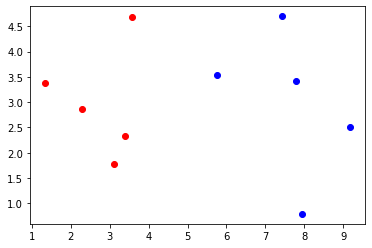

In [5]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='r')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='b')
plt.show()

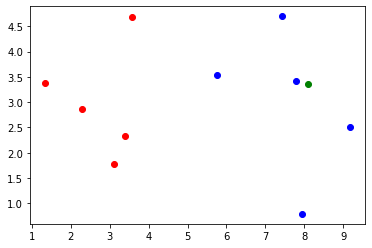

In [6]:
# 给定待预测数据，预测他的结果
x = np.array([8.0936, 3.3657])
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='r')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='b')
plt.scatter(x[0],x[1],color='g')
plt.show()

In [7]:
# 计算每一个点到绿色点的距离
from math import sqrt
distance = []  # 保存和其他所有点的距离
for x_train in X_train:
    """方法一，适用于二维"""
    distance.append(sqrt((x_train[0]-x[0])**2+(x_train[1]-x[1])**2))
    """方法二，适用于多维"""
#     distance.append(sqrt(np.sum((x_train-x)**2)))
    
"""方法三，列表生成式"""
# distance = [sqrt(np.sum((x_train-x)**2)) for x_train in X_train]

'方法三，列表生成式'

In [8]:
distance

[4.81260119478022,
 5.229241043401997,
 6.749800540015979,
 4.698628516918528,
 5.834551904816684,
 1.4900324425998253,
 2.354522698977439,
 1.3761246745843922,
 0.30641670972713025,
 2.578690607653427]

In [9]:
#  找出离待预测的点距离最近的k个点
k = 3
nearest = np.argsort(distance)

In [10]:
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [11]:
nearest[:k]

array([8, 7, 5], dtype=int64)

In [12]:
nearest = [i for i in nearest[:k]]

In [13]:
nearest

[8, 7, 5]

In [14]:
# 找出最近的k个点下标值以后，找出这些样本对应的目标值
y_train[nearest]

array([1, 1, 1])

In [15]:
top_K = [i for i in y_train[nearest]]

In [16]:
top_K

[1, 1, 1]

In [17]:
# 计算投票结果
from collections import Counter

votes = Counter(top_K)

In [18]:
# 其他的计票方法
votes_test = Counter([1,1,0,2,2,2]) # 传入一个列表
votes_test

Counter({1: 2, 0: 1, 2: 3})

In [19]:
y_predict = votes.most_common(1)[0][0]

In [20]:
y_predict

1

### 封装及调用

In [26]:
%run my_knn.py

In [27]:
knn = Knn()

In [28]:
knn.fit(X_train,y_train)

KnnClassifier(n_neighbor=3)

In [31]:
x = np.array([[9,4],[3,5],[10,2]]) # 这里是双层括号
pre = knn.predict(x)
pre

array([1, 0, 1])